# Questions
### 1) Which factor influenced a candidate in getting placed?
### 2) Does percentage matters for one to get placed?
### 3) Is there a relation of gender bias in placement status?
### 4) Which degree specialization is much demanded by corporate?
### 5)  How is the salary compared to HSC Subject of the candidate?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
df=pd.read_csv('Placement_Data_Full_Class.csv',index_col='sl_no') 
df_b=pd.read_csv('Placement_Data_Full_Class.csv',index_col='sl_no') ##backup data for another set of analysis

In [4]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


##  Which factor influenced a candidate in getting placed?

In [5]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [6]:
a=df.corr() ## finding the correation of every column to know the relation better
a

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


#### As we want to find the co-relation for all values in getting placed we need to convert some categorical values to binary form

In [7]:
df['workex']=df['workex'].map({'Yes':1,'No':0})
df['gender']=df['gender'].map({'M':1,'F':0})
df['status']=df['status'].map({'Placed':1,'Not Placed':0})

In [8]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,NaN
5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


#### now we can plot the co-realtion of various features with the placement status

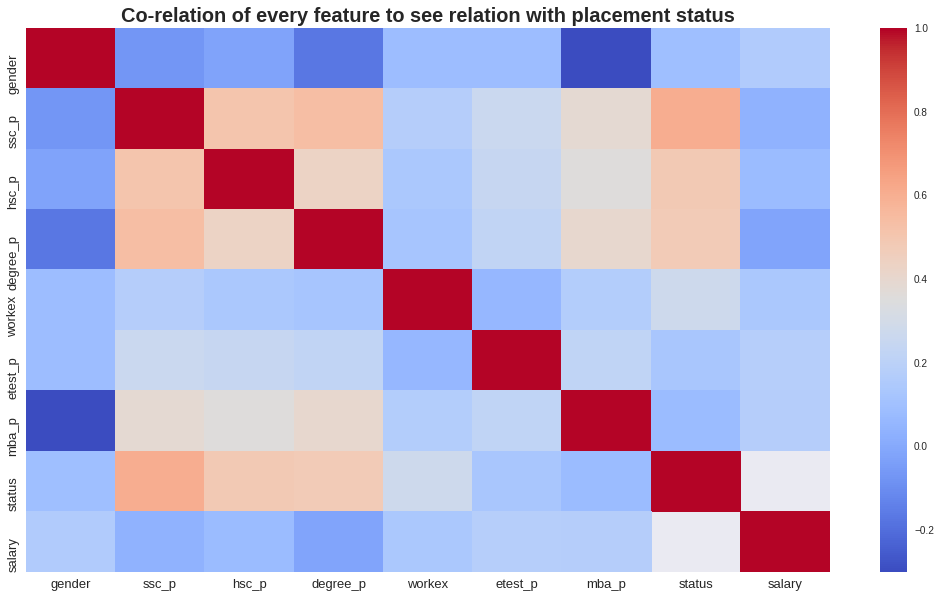

In [40]:
a=df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(a,cmap='coolwarm')
plt.title('Co-relation of every feature to see relation with placement status',fontsize=20,fontweight='bold')
plt.xticks(fontsize=13,fontweight=500)
plt.yticks(fontsize=13,fontweight=500)
plt.show()

### We can see that SSC percentage has the highest priority in placement status and then the priority status is
#### 2) hsc percentage
#### 3) degree percentage
#### 4) work experience
#### 5) job quality test
#### 6) mba percentage

### SO we can also say that percentage does matter in getting placed

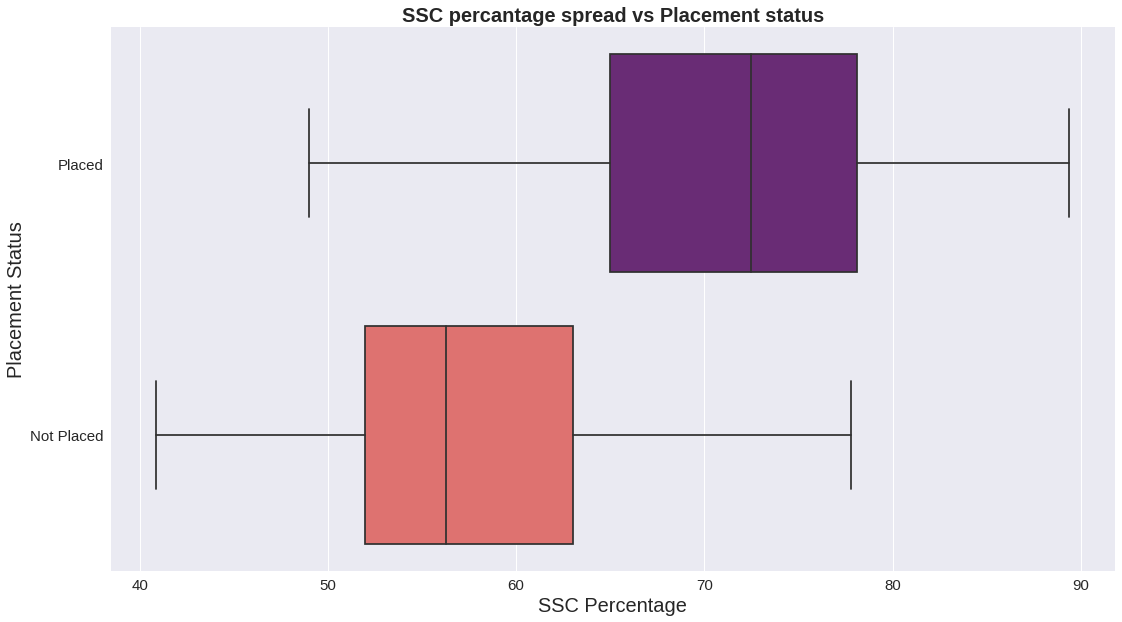

In [59]:
## we can further verify the above analysis by a boxplot of ssc percentage and placement status
plt.figure(figsize=(18,10))
sns.boxplot('ssc_p','status',data=df_b,palette='magma')
plt.title('SSC percantage spread vs Placement status',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight=500)
plt.yticks(fontsize=15,fontweight=500)
plt.xlabel('SSC Percentage',fontsize=20)
plt.ylabel('Placement Status',fontsize=20)
plt.show()

### Is there a relation of gender bias in placement status?

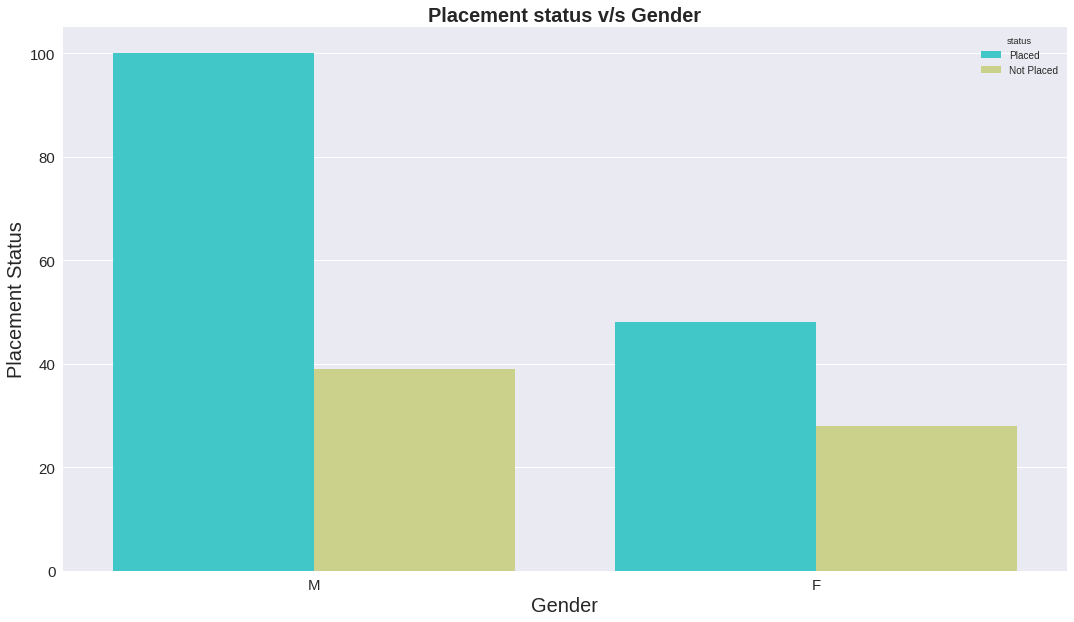

In [60]:
plt.figure(figsize=(18,10))
sns.countplot(x='gender',data=df_b,hue='status',palette='rainbow')
plt.title('Placement status v/s Gender',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight=500)
plt.yticks(fontsize=15,fontweight=500)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Placement Status',fontsize=20)
plt.show()

### we can see there is a slight gender bias towards males in placement status but that maybe because the dataset is small

## Which degree specialization is much demanded by corporate?

In [12]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

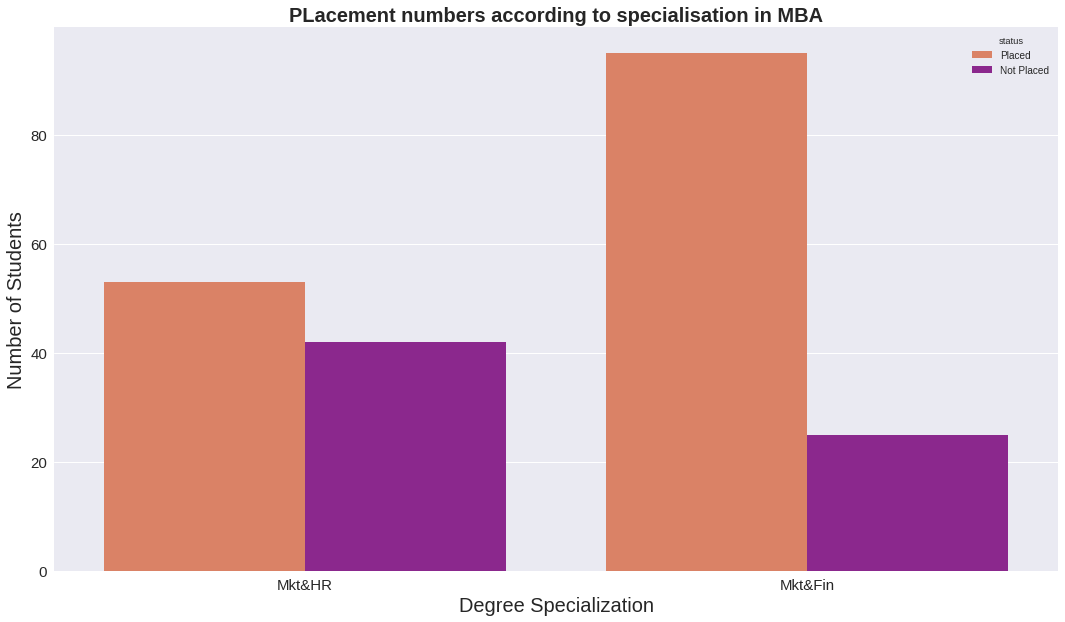

In [63]:
plt.figure(figsize=(18,10))
sns.countplot(x='specialisation',data=df_b,hue='status',palette='plasma_r')
plt.title('PLacement numbers according to specialisation in MBA',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight=500)
plt.yticks(fontsize=15,fontweight=500)
plt.xlabel('Degree Specialization',fontsize=20)
plt.ylabel('Number of Students',fontsize=20)
plt.show()

### We see that marketing and finance specialisation has a much more demand by corporate than marketing and HR
#### We can further compare the salaries provided to each specialisation.

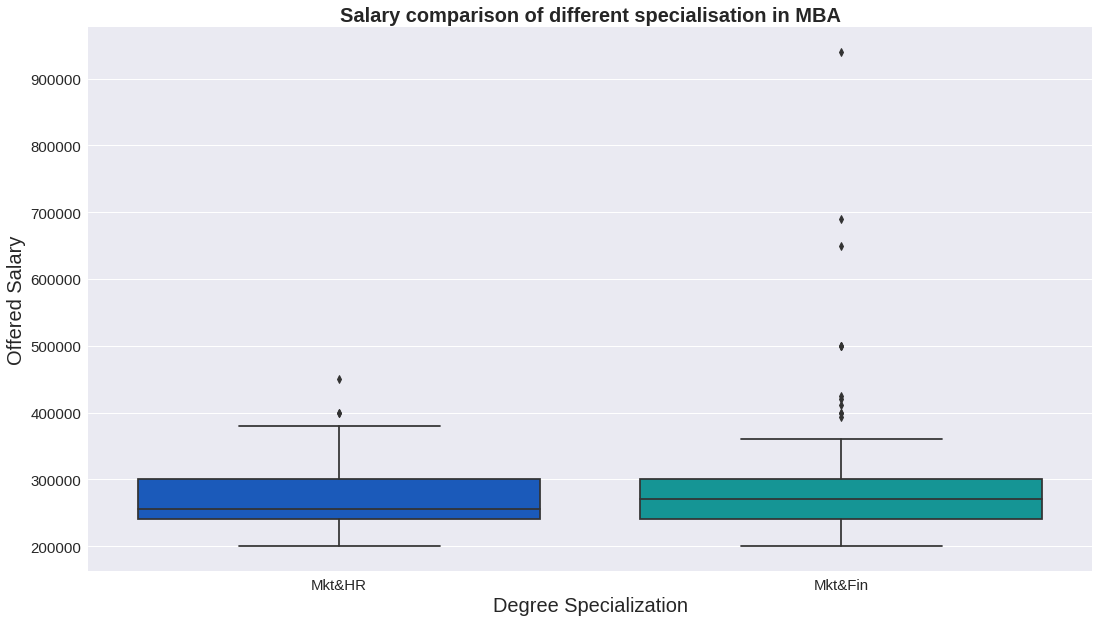

In [64]:
plt.figure(figsize=(18,10))
sns.boxplot(x='specialisation',y='salary',data=df,palette='winter')
plt.title('Salary comparison of different specialisation in MBA',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight=500)
plt.yticks(fontsize=15,fontweight=500)
plt.xlabel('Degree Specialization',fontsize=20)
plt.ylabel('Offered Salary',fontsize=20)
plt.show()

## How is the salary compared to HSC Subject of the candidate?

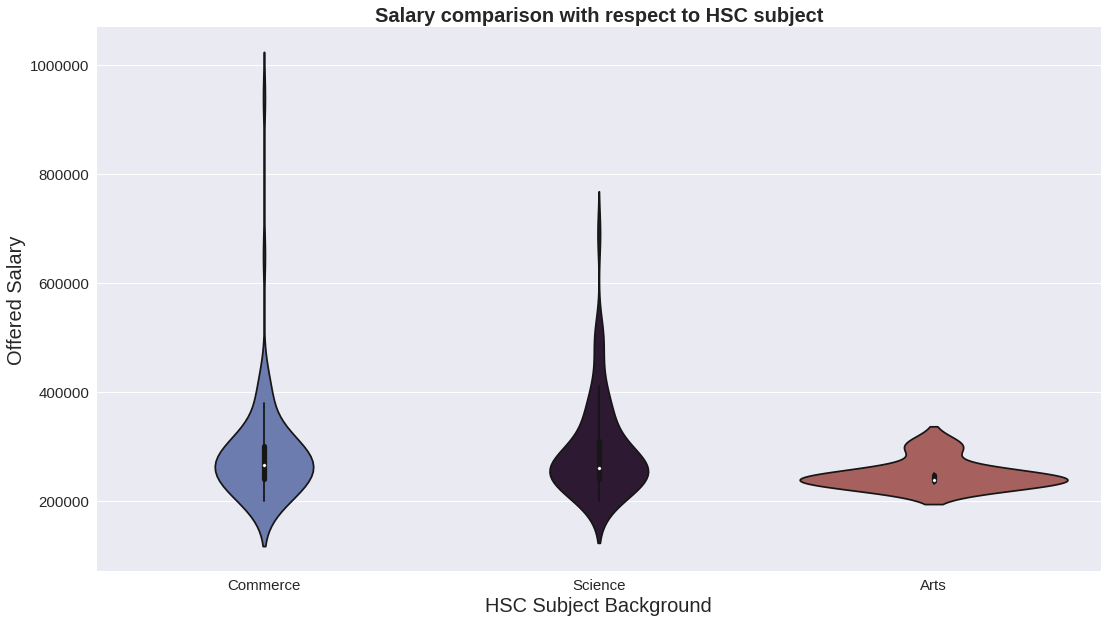

In [65]:
plt.figure(figsize=(18,10))
sns.violinplot(x='hsc_s',y='salary',data=df,palette='twilight')
plt.title('Salary comparison with respect to HSC subject',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight=500)
plt.yticks(fontsize=15,fontweight=500)
plt.xlabel('HSC Subject Background',fontsize=20)
plt.ylabel('Offered Salary',fontsize=20)
plt.show()

### We can observe that candidates having commerce or science have a higher number in placements than of arts
### Also candidates with commerece background had a higher salary range than that of science background whereas arts background students had a limited salary